# Wind Turbine Scada Dataset

### Describe data 

* Date/Time (for 10 minutes intervals)
* LV ActivePower (kW): The power generated by the turbine for that moment
* Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
* TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
* Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

### EDA

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Read Data

In [2]:
df=pd.read_csv('T1.csv')
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
## Rename columns
df=df.rename(columns={"LV ActivePower (kW)": "ActivePower","Wind Speed (m/s)":"Wind Speed","Theoretical_Power_Curve (KWh)":"Theoretical_Power_Curve","Wind Direction (°)":"Wind Direction"})
df.head()

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df.shape

(50530, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date/Time                50530 non-null  object 
 1   ActivePower              50530 non-null  float64
 2   Wind Speed               50530 non-null  float64
 3   Theoretical_Power_Curve  50530 non-null  float64
 4   Wind Direction           50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [6]:
## change data type from object to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [7]:
df.head()

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [8]:
## check null
df.isna().sum()

Date/Time                  0
ActivePower                0
Wind Speed                 0
Theoretical_Power_Curve    0
Wind Direction             0
dtype: int64

In [9]:
## check duplicate
df.duplicated().sum()

0

In [10]:
df.describe()

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


* Data not nurmal distribution

#### Univariant analysis

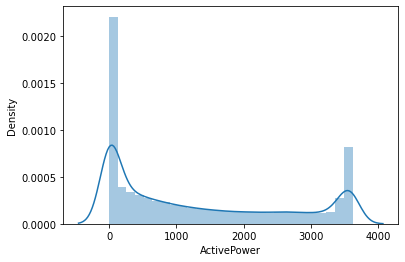

In [11]:
## Check distribution 
#df[["ActivePower","Wind Speed","Theoretical_Power_Curve","Wind Direction"]].hist(figsize=[10,10]);
sns.distplot(df["ActivePower"]);

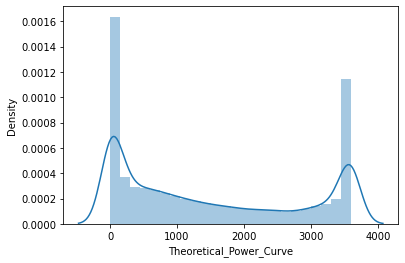

In [12]:
sns.distplot(df["Theoretical_Power_Curve"]);

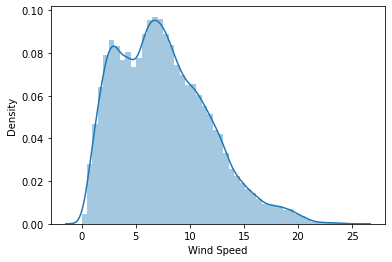

In [13]:
sns.distplot(df["Wind Speed"]);

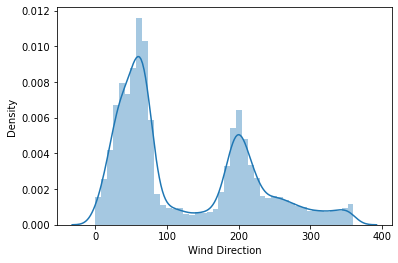

In [14]:
sns.distplot(df["Wind Direction"]);

* Data not normal distributed and have outlier

* We noticed that we have Activepower,Wind Speed,Theoretical_Power_Curve = 0 

In [15]:
## Wind Speed = 0
power_0=df[df['Wind Speed']==0]
power_0

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
1478,2018-11-01 09:50:00,0.0,0.0,0.0,0.0
3629,2018-01-30 16:40:00,0.0,0.0,0.0,0.0
14647,2018-04-17 06:50:00,0.0,0.0,0.0,0.0
17116,2018-04-05 13:10:00,0.0,0.0,0.0,0.0
20369,2018-05-27 03:50:00,0.0,0.0,0.0,0.0
23280,2018-06-16 15:40:00,0.0,0.0,0.0,0.0
24819,2018-06-27 14:00:00,0.0,0.0,0.0,0.0
36045,2018-09-13 19:50:00,0.0,0.0,0.0,0.0
46598,2018-04-12 14:50:00,0.0,0.0,0.0,0.0
46637,2018-04-12 21:30:00,0.0,0.0,0.0,0.0


* When Wind Speed = 0, ActivePower is equal Zero. So, we will drop this subset	

In [16]:
# Drop all rows Wind Speed = 0
df=df.drop(df[df['Wind Speed']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [17]:
# Theoretical_Power_Curve =0
Theoretical_0=df[df['Theoretical_Power_Curve']==0]
Theoretical_0

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
384,2018-03-01 16:00:00,-0.393068,2.185888,0.0,238.410294
385,2018-03-01 16:10:00,0.000000,2.142016,0.0,234.762405
386,2018-03-01 16:20:00,0.000000,2.501406,0.0,223.308807
387,2018-03-01 16:30:00,0.000000,2.668578,0.0,226.051697
491,2018-04-01 12:40:00,0.000000,2.888112,0.0,0.000000
...,...,...,...,...,...
50460,2018-12-31 12:20:00,0.000000,2.722504,0.0,82.736252
50461,2018-12-31 12:30:00,0.000000,2.869853,0.0,81.974297
50465,2018-12-31 13:10:00,0.000000,2.998981,0.0,76.018478
50466,2018-12-31 13:20:00,0.000000,2.647908,0.0,78.276291


In [18]:
Theoretical_0['Wind Speed'].max()

2.99958300590515

* From the above we noticed that when Wind Speed < 2.99958300590515, Theoretical_Power_Curve and ActivePower = 0. So, we will drop this subset from dataframe

In [19]:
df=df.drop(df[df['Theoretical_Power_Curve']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [20]:
df[df['ActivePower']<0]

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
1402,2018-10-01 21:10:00,-0.038067,3.248698,28.906391,279.040100
1589,2018-12-01 04:30:00,-0.959000,3.333948,35.608029,206.130402
3015,2018-01-22 02:10:00,-0.099067,3.047134,17.686014,255.811798
5574,2018-02-13 04:50:00,-0.718266,3.179412,24.316270,297.895691
6263,2018-02-17 23:40:00,-0.888135,3.597724,63.709081,90.629913
6676,2018-02-20 20:30:00,-2.471405,3.069953,18.629968,86.892776
7795,2018-02-28 15:00:00,-0.071800,4.591375,241.595226,7.084192
12693,2018-03-04 15:30:00,-0.085067,3.038847,17.363830,51.347980
12747,2018-04-04 00:30:00,-0.504002,3.097465,19.878836,92.270073
13351,2018-08-04 05:20:00,-0.001267,3.316337,34.128321,77.254852


* Negative ActivePower due to the Current transformers have been fitted onto the cable or busbar the wrong way round.
https://www.se.com/uk/en/faqs/FA86375/#:~:text=Search-,Why%20is%20the%20kW%20(Active%20Power)%20showing%20a%20negative%20reading,the%20Powerlogic%20series%20of%20meter%3F&text=The%20Current%20transformers%20(CT's)%20have,should%20be%20towards%20the%20load.

* So, We will drop all these wrong values  

In [21]:
df=df.drop(df[df['ActivePower']<0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [22]:
# Check if any row contain ActivePower = 0
df[df['ActivePower']==0]

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
382,2018-03-01 15:40:00,0.0,3.743307,83.986265,245.068207
388,2018-03-01 16:40:00,0.0,3.034003,17.180593,221.086502
389,2018-03-01 16:50:00,0.0,3.197354,25.431221,232.679596
390,2018-03-01 17:00:00,0.0,3.907811,110.979604,241.973099
498,2018-04-01 13:50:00,0.0,3.441704,45.742725,79.094109
...,...,...,...,...,...
50462,2018-12-31 12:40:00,0.0,3.201952,25.725232,73.194389
50463,2018-12-31 12:50:00,0.0,3.861320,102.912015,75.005074
50464,2018-12-31 13:00:00,0.0,3.012923,16.426896,79.551987
50468,2018-12-31 13:40:00,0.0,3.670288,73.392108,71.954659


In [23]:
# We will check this part later

#### Bivariant analysis

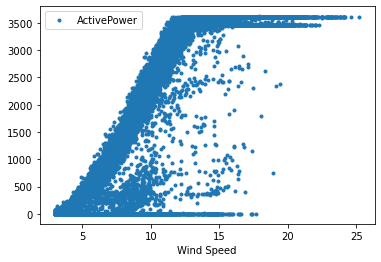

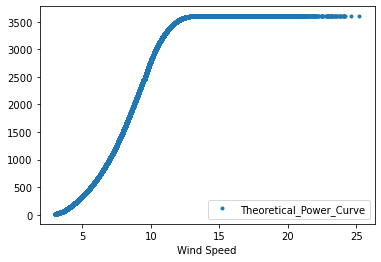

In [24]:
columns=['ActivePower','Theoretical_Power_Curve']
for col in columns:
    df.plot(x="Wind Speed",y=col,style='.')
    plt.show
    

* We noticed all the time Theoretical_Power_Curve is increasing with Wind Speed is increasing

* But ActivePower in some case not increased with increasing Wind Speed 

### Time Series Analysis 

In [25]:
df_date1=df.set_index('Date/Time')
df_date1.head()

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [26]:
df_date1['Year']=df_date1.index.year
df_date1['Month']=df_date1.index.month
df_date1['Hour']=df_date1.index.hour
df_date1['Season']=df_date1.index.quarter
df_date1['Day']=df_date1.index.day
df_date1['minute']=df_date1.index.minute

df_date1

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction,Year,Month,Hour,Season,Day,minute
Date/Time,,,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0,1,1,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0,1,1,10
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0,1,1,20
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0,1,1,30
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0,1,1,40
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,23,4,31,10
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,23,4,31,20
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,23,4,31,30


In [27]:
df_date1[['Year',"Month",'Hour','Season']].nunique()

Year       1
Month     12
Hour      24
Season     4
dtype: int64

* This data represent 1 year 2018 

######  More analysis when Activepower = 0

In [28]:
active_0=df_date1[df_date1['ActivePower']==0]
active_0

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction,Year,Month,Hour,Season,Day,minute
Date/Time,,,,,,,,,,
2018-03-01 15:40:00,0.0,3.743307,83.986265,245.068207,2018,3,15,1,1,40
2018-03-01 16:40:00,0.0,3.034003,17.180593,221.086502,2018,3,16,1,1,40
2018-03-01 16:50:00,0.0,3.197354,25.431221,232.679596,2018,3,16,1,1,50
2018-03-01 17:00:00,0.0,3.907811,110.979604,241.973099,2018,3,17,1,1,0
2018-04-01 13:50:00,0.0,3.441704,45.742725,79.094109,2018,4,13,2,1,50
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 12:40:00,0.0,3.201952,25.725232,73.194389,2018,12,12,4,31,40
2018-12-31 12:50:00,0.0,3.861320,102.912015,75.005074,2018,12,12,4,31,50
2018-12-31 13:00:00,0.0,3.012923,16.426896,79.551987,2018,12,13,4,31,0


In [29]:
active_0.groupby('Hour')['ActivePower'].sum()


Hour
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: ActivePower, dtype: float64

In [30]:
active_0.groupby('minute')['ActivePower'].sum()

minute
0     0.0
10    0.0
20    0.0
30    0.0
40    0.0
50    0.0
Name: ActivePower, dtype: float64

In [31]:
active_0.groupby('Day')['ActivePower'].sum()

Day
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: ActivePower, dtype: float64

* We noticed Active Power = 0 in many times in each Day without specific pattern this may be due to turbine is under maintenance.
https://www.luvside.de/en/wind-turbine-not-turning/

* So we will drop this subset

In [32]:
df=df.drop(df[df['ActivePower']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


##### Analysis by Hour

In [33]:
Num_col=['ActivePower','Wind Speed','Theoretical_Power_Curve','Wind Direction']

In [34]:
data_hour=df_date1[Num_col].resample('H').sum()
data_hour

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
Date/Time,,,,
2018-01-01 00:00:00,2342.882172,33.041207,2834.413361,1602.711792
2018-01-01 01:00:00,2763.222748,33.865230,3080.510451,1553.673279
2018-01-01 02:00:00,4401.932251,38.712225,4730.407860,1610.384796
2018-01-01 03:00:00,5456.172485,40.868731,5692.760077,1536.088593
2018-01-01 04:00:00,8361.109131,46.492495,8438.350772,1485.914810
...,...,...,...,...
2018-12-31 19:00:00,6392.630493,38.890730,5307.400159,517.732506
2018-12-31 20:00:00,9774.249023,48.501863,9562.919734,478.859840
2018-12-31 21:00:00,12813.189819,54.731171,13347.999456,478.937035


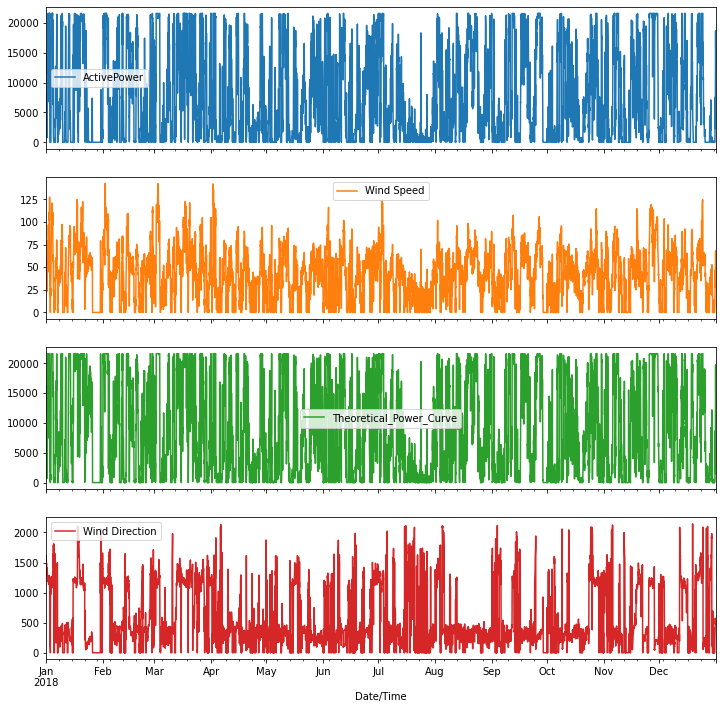

In [35]:
data_hour.plot(figsize=[12,12], subplots=True,fontsize=10);

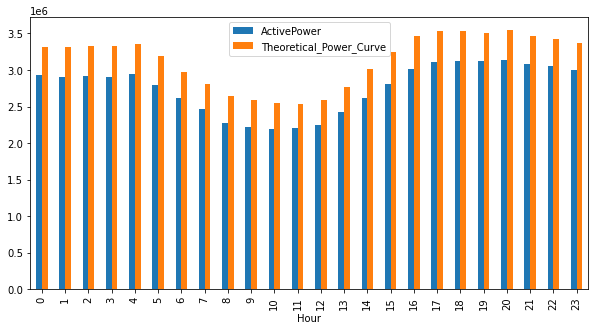

In [36]:
df_date1.groupby('Hour')[['ActivePower','Theoretical_Power_Curve']].sum().plot(figsize=(10,5),kind='bar');


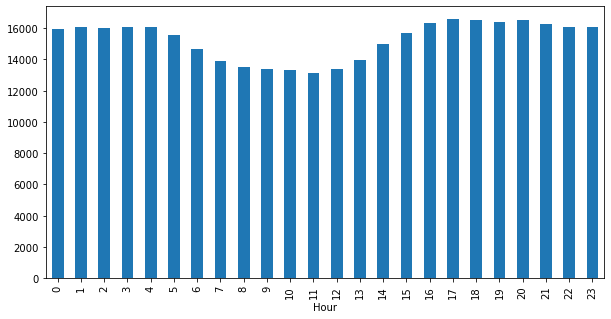

In [37]:
df_date1.groupby('Hour')['Wind Speed'].sum().plot(figsize=(10,5),kind='bar');

* Strong relation between wind speed and ActivePower 

* From hours(7-13) wind speed low and ActivePower also low

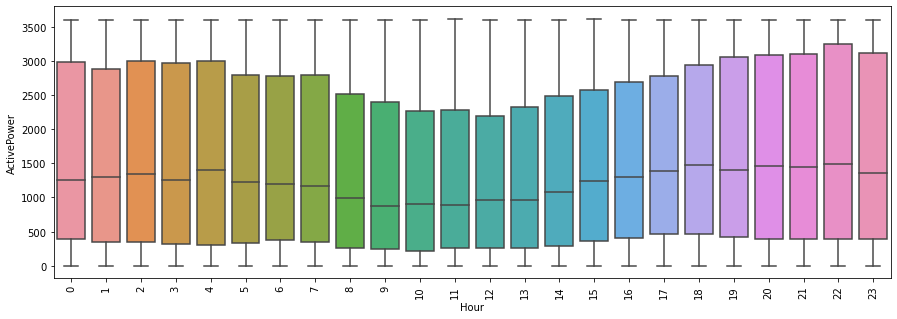

In [38]:
plt.figure(figsize=(15,5))
chart=sns.boxplot(x='Hour',y='ActivePower',data=df_date1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


* No outlier 

##### Analysis by week

In [39]:
data_week=df_date1[Num_col].resample('W').sum()
data_week.head(24)

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
Date/Time,,,,
2018-01-07,1.574454e+06,8699.695333,1.728419e+06,151283.124809
2018-01-14,1.074233e+06,7059.293887,1.508345e+06,45824.097209
2018-01-21,2.483977e+06,11982.439674,2.873639e+06,201458.530632
2018-01-28,2.534379e+05,5467.898281,1.305769e+06,22371.916002
2018-02-04,1.537998e+06,8385.858195,1.801903e+06,151017.422045
2018-02-11,1.223176e+06,6618.826411,1.437774e+06,50989.326604
2018-02-18,1.412021e+06,6840.049453,1.443456e+06,91457.815392
2018-02-25,7.712735e+05,6174.522386,1.243409e+06,68694.517840
2018-03-04,1.733848e+06,10119.674603,1.954153e+06,156875.095039


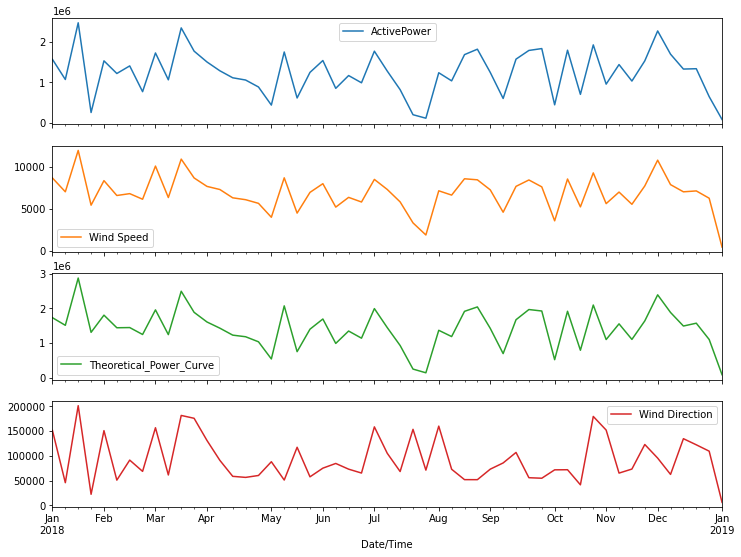

In [40]:
data_week.plot(figsize=[12,9], subplots=True);

* Noticed that by the end of Jan. activepower decrease

##### Analysis by Month

In [41]:
data_mon=df_date1[Num_col].resample('M').sum()
data_mon

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
Date/Time,,,,
2018-01-31,5.429804e+06,34105.370456,7.580026e+06,450802.017044
2018-02-28,5.452193e+06,30767.104469,6.512972e+06,398836.605806
2018-03-31,7.787952e+06,39443.389419,8.317663e+06,626356.630840
2018-04-30,4.494872e+06,26863.850403,5.018005e+06,293304.091951
2018-05-31,4.902139e+06,28309.052568,5.669760e+06,323808.397355
2018-06-30,4.998461e+06,27625.532376,5.695020e+06,404712.232483
2018-07-31,3.099471e+06,22010.895451,3.486615e+06,444584.537473
2018-08-31,6.689632e+06,35119.592448,7.507082e+06,354393.497048
2018-09-30,5.968776e+06,29779.096774,6.407865e+06,343364.097457


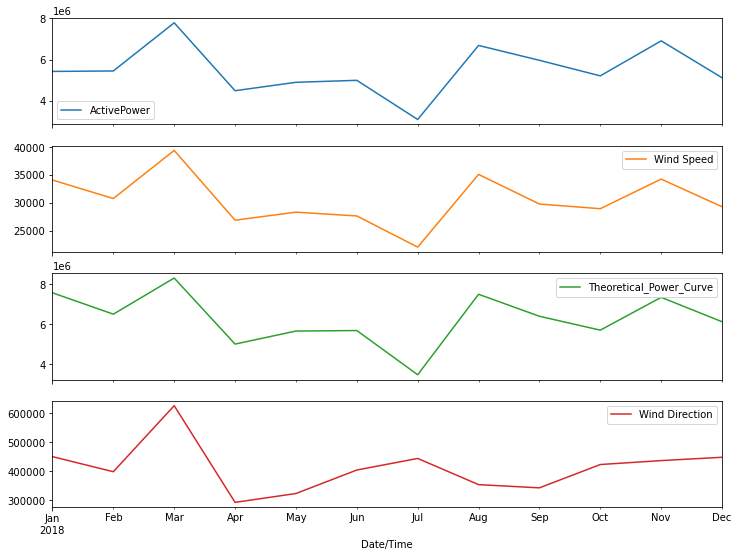

In [42]:
data_mon.plot(figsize=[12,9], subplots=True);

* In March, wind speed is high so Active power is the highest on it

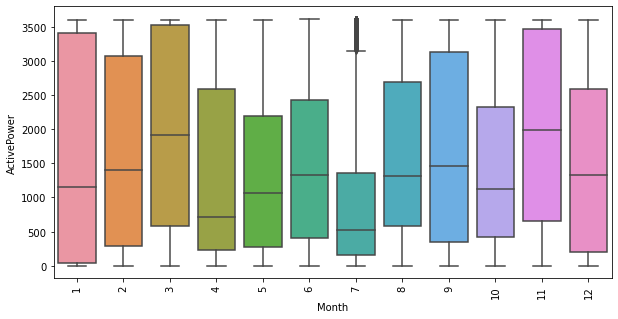

In [43]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x='Month',y='ActivePower',data=df_date1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


##### Analysis by Season

In [44]:
#df_new=df_date.reset_index('Date/Time')
#def find_season(x):
 #   if x in df_new[(df_new['Date/Time'] > '2018-03-22') & (df_new['Date/Time']<='2018-06-21')]:
  #      return 'Spring'
   # if x in df_new[(df_new['Date/Time']>'2018-06-22') & (df_new['Date/Time']<='2018-09-20')]:
    #    return 'Summer'
    #if x in df_new[(df_new['Date/Time']>'2018-09-21') & (df_new['Date/Time']<='2018-12-22')]: 
     #   return "Autumn"
    #else:
     #   return 'Winter'


In [45]:
#df_new['Season']=df_new['Date/Time'].apply(find_season)

In [46]:
#df_new

In [47]:
#df_new['Season'].value_counts()

In [48]:
#df_new.groupby('Season')[['Wind Speed','Theoretical_Power_Curve']].sum()

In [49]:
data_season=df_date1[Num_col].resample('Q').sum()
data_season

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
Date/Time,,,,
2018-03-31,1.866995e+07,104315.864345,2.241066e+07,1.475995e+06
2018-06-30,1.439547e+07,82798.435347,1.638279e+07,1.021825e+06
2018-09-30,1.575788e+07,86909.584672,1.740156e+07,1.142342e+06
2018-12-31,1.725028e+07,92498.811651,1.920388e+07,1.309474e+06


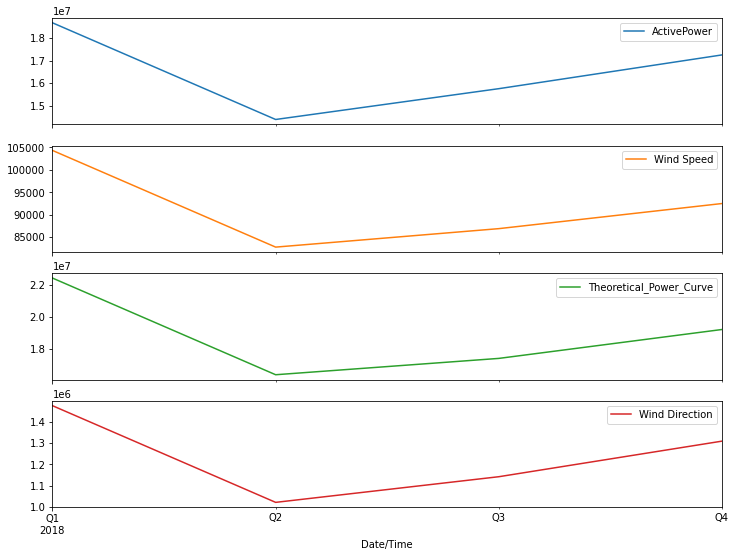

In [50]:
data_season.plot(figsize=[12,9], subplots=True);

* We noticed 2nd quarter 'Summer' is the lowest season in wind speed and active power

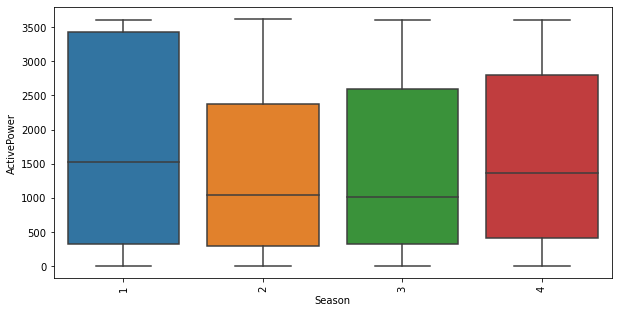

In [51]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x='Season',y='ActivePower',data=df_date1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


* No outlier found in Seasonn

##### Analysis by direction

In [52]:
def direction(x):
    if x > 0 and x < 45: 
        return 'NE'
    if x > 45 and x < 90: 
        return 'E'
    if x > 90 and x < 135: 
        return 'SE'
    if x > 135 and x < 180: 
        return 'S'
    if x > 180 and x < 225: 
        return 'SW'
    if x > 225 and x < 270: 
        return 'W'
    if x > 270 and x < 315: 
        return 'NW'
    else: return 'N'
    

In [53]:
df_date1['direction']=df_date1['Wind Direction'].apply(direction)

In [54]:
df_date1.head()

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction,Year,Month,Hour,Season,Day,minute,direction
Date/Time,,,,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0,1,1,0,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0,1,1,10,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0,1,1,20,NW
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0,1,1,30,NW
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0,1,1,40,W


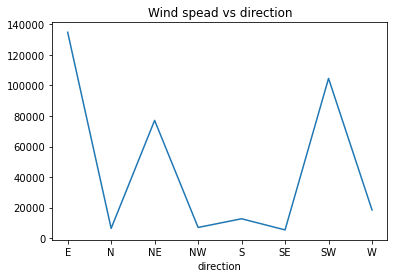

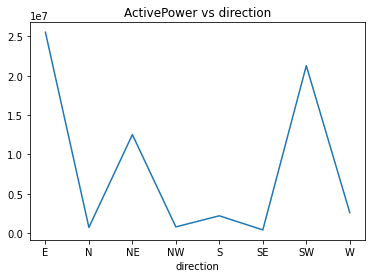

In [55]:
df_date1.groupby('direction')['Wind Speed'].sum().plot(title='Wind spead vs direction')
plt.show()
df_date1.groupby('direction')['ActivePower'].sum().plot(title='ActivePower vs direction')
plt.show()

* E has the highes wind spead and activepower

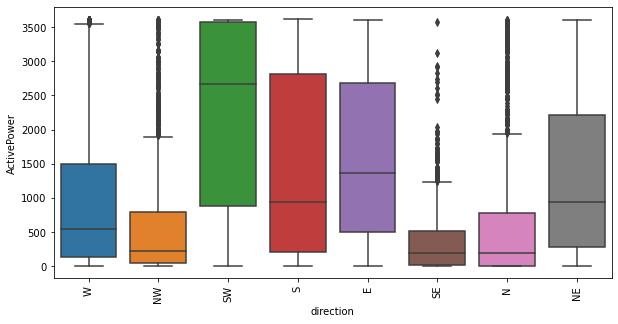

In [56]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x='direction',y='ActivePower',data=df_date1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


##### Feature Extraction

In [57]:
df_date1['different in power']=df_date1['Theoretical_Power_Curve']-df_date1['ActivePower']

In [58]:
df_date1.head()

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction,Year,Month,Hour,Season,Day,minute,direction,different in power
Date/Time,,,,,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0,1,1,0,W,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0,1,1,10,W,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0,1,1,20,NW,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0,1,1,30,NW,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0,1,1,40,W,111.052276


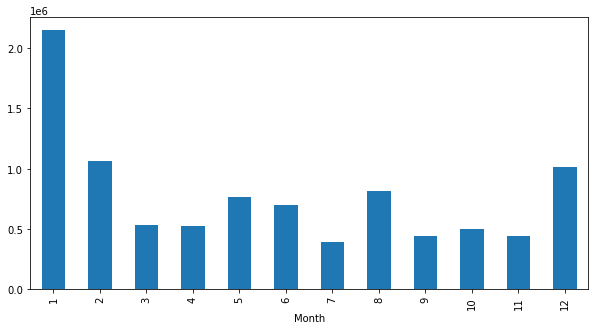

In [59]:
df_date1.groupby('Month')['different in power'].sum().plot(figsize=(10,5),kind='bar');

* Large amount of ActivePower loss in January

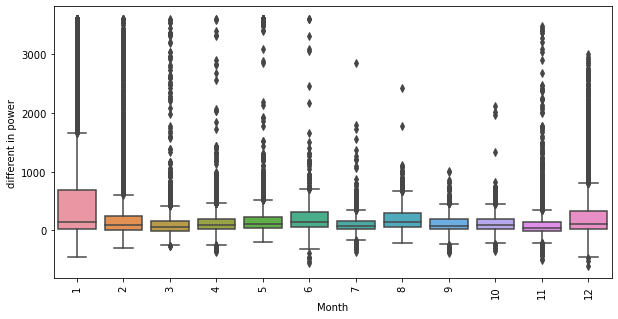

In [60]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x='Month',y='different in power',data=df_date1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


* large amount of different in power between active power and Theoretical_Power_Curve in January, Febuary and December 

In [61]:
df_date=df_date1[['ActivePower','Wind Speed','Theoretical_Power_Curve','Wind Direction','different in power']]

In [62]:
df_corr=df_date.corr()
df_corr

,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction,different in power
ActivePower,1.000000,0.902958,0.938797,0.028155,-0.121883
Wind Speed,0.902958,1.000000,0.935379,0.051269,0.142597
Theoretical_Power_Curve,0.938797,0.935379,1.000000,-0.008296,0.227478
Wind Direction,0.028155,0.051269,-0.008296,1.000000,-0.103496
different in power,-0.121883,0.142597,0.227478,-0.103496,1.000000


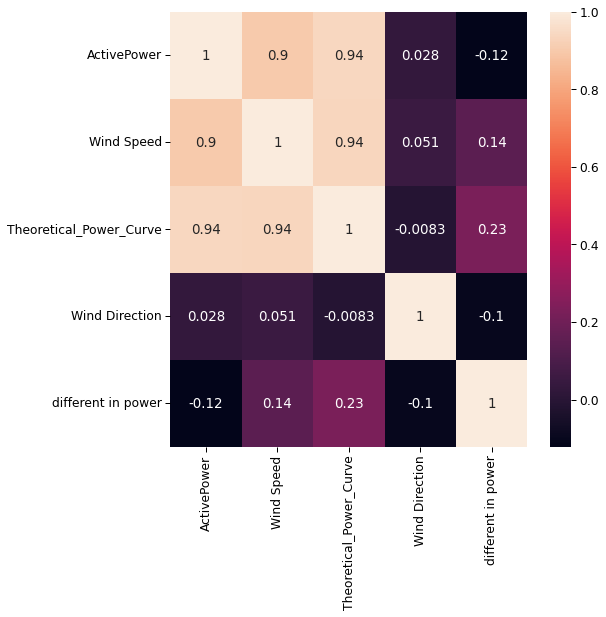

In [63]:
plt.figure(figsize=(8,8))
sns.set_context('paper',font_scale=1.4)

sns.heatmap(df_corr,annot=True);

* Srong correlation between Wind Speed and Active power

### Machine learning

* We will predict "ActivePower"

* And we will exclude 'Date/time, Theoretical_Power_Curve' from our data 

In [64]:
## Split data to X, y

X=df[['Wind Speed','Wind Direction']]
y=df['ActivePower']


In [65]:
## MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit(X)
X=m.fit_transform(X)


In [66]:
## Split to train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

###### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE
y_pred_train=model.predict(X_train)
print(MAE(y_train,y_pred_train))
y_pred_test=model.predict(X_test)
print(MAE(y_test,y_pred_test))


0.0
150.04208739567656


In [69]:
y_pred_train=model.score(X_train,y_train)
print(y_pred_train)
y_pred_test=model.score(X_test,y_test)
print(y_pred_test)

1.0
0.9279085804721111


* Decision Tree is overfitting

###### Linear Model

In [144]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [145]:
y_pred_train=lr.predict(X_train)
#print(MAE(y_train,y_pred_train))
y_pred_test=lr.predict(X_test)
print(MAE(y_test,y_pred_test))


330.8991150425818


In [146]:
y_pred_test=lr.score(X_train,y_train)
print(y_pred_test)
y_pred_test=lr.score(X_test,y_test)
print(y_pred_test)

0.859915632873718
0.8638536346390355


* May be this data not linear

###### Using KNeighbors

In [73]:
from sklearn.neighbors import KNeighborsRegressor
KN=KNeighborsRegressor(n_neighbors=200)
KN.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=200)

In [74]:
y_pred_train=KN.predict(X_train)
print(MAE(y_train,y_pred_train))
y_pred_test=KN.predict(X_test)
print(MAE(y_test,y_pred_test))


118.84002050834344
116.03890222444741


In [143]:
y_pred_test=KN.score(X_train,y_train)
print(y_pred_test)
y_pred_test=KN.score(X_test,y_test)
print(y_pred_test)

0.9581276455108682
0.9607994650274628


###### Using RandomForest

In [82]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=700)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=700)

In [108]:
y_pred_test=RF.predict(X_test)
print(MAE(y_test,y_pred_test))

120.5866854280291


In [109]:
#y_pred_test=model.score(X_train,y_train)
#print(y_pred_test)
y_pred_test=RF.score(X_test,y_test)
print(y_pred_test)

0.9554034929737184


###### Using GradientBoosting

In [220]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=1000)
GB.fit(X_train ,y_train)

GradientBoostingRegressor(n_estimators=1000)

In [221]:
y_pred_test=GB.predict(X_test)
print(MAE(y_test,y_pred_test))

114.70289475255636


In [222]:
y_pred_test=GB.score(X_test,y_test)
print(y_pred_test)

0.9595357143534786


###### Using xgboost

In [203]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=25)
xgb.fit(X_train ,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [204]:
y_pred_test=xgb.predict(X_test)
print(MAE(y_test,y_pred_test))

112.8283864671101


In [205]:
y_pred_test=xgb.score(X_test,y_test)
print(y_pred_test)

0.9605639302737987


###### Using lgbm

In [182]:
import lightgbm as lgb
clf = lgb.LGBMRegressor(n_estimators=100)
clf.fit(X_train,y_train)

LGBMRegressor()

In [183]:
y_pred_test=clf.predict(X_test)
print(MAE(y_test,y_pred_test))

112.29142014249061


In [184]:
y_pred_test=clf.score(X_test,y_test)
print(y_pred_test)

0.9614039520377222


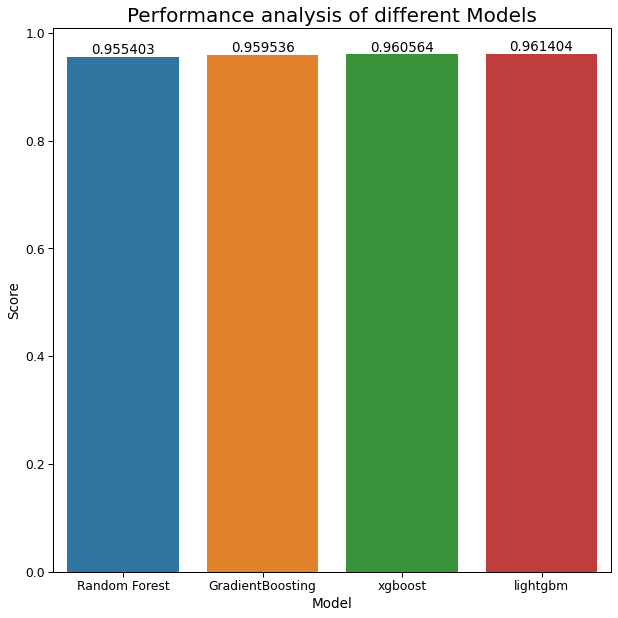

In [225]:
Performance = pd.DataFrame(
    data = {
        'Model': ['Random Forest','GradientBoosting','xgboost','lightgbm'],
        'Score': [0.9554034929737184,0.9595357143534786,0.9605639302737987, 0.9614039520377222],
        }
)


plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Model", y="Score", data= Performance)
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different Models',fontsize=20)
plt.show()

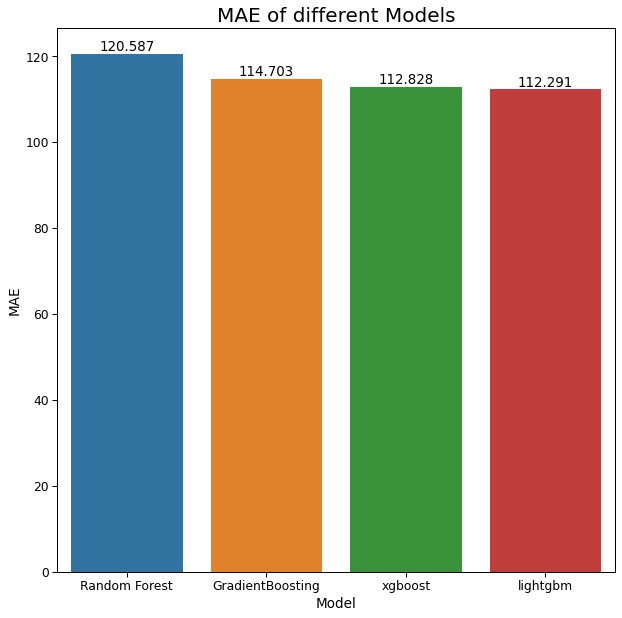

In [230]:
Performance = pd.DataFrame(
    data = {
        'Model': ['Random Forest','GradientBoosting','xgboost','lightgbm'],
        'MAE': [120.5866854280291,114.70289475255636,112.8283864671101, 112.29142014249061],
        }
)


plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Model", y="MAE", data= Performance)
ax.bar_label(ax.containers[0])
plt.title('MAE of different Models',fontsize=20)
plt.show()

***Conclusion: lightgbm is the best model for wind activepower prediction